===========================================


Title: 3.2 Exercises


Author: Chad Wood


Date: 19 Dec 2021


Modified By: Chad Wood


Description: This program demonstrates the use of text recognition libraries to parse text and tables from unstructured data types (i.e., images), and using spaCy to provide details of recognized text.


=========================================== 

### Read the text from [this PDF file](https://github.com/bellevue-university/dsc360/raw/main/12%20Week/week_3/Week_3_No_Tables.pdf) using Python. Print the results.

In [9]:
import PyPDF2

pdfFileObj = open('Data/Week_3_No_Tables.pdf', 'rb')

# Reads PDF info PdfFileReader object; Gets first page
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)

print(pageObj.extractText())

Exercises
 
1.
 
Create a simple PDF file without tables (you can use Microsoft Word to create a document and 
save it as a PDF file) and read the text using Python. Print the results. 
 
2.
 
C
reate a simple PDF file with tables (you can use Microsoft Word to create a docum
ent and save 
it as a PDF file) and read the text using Python. Print the results.
 
3.
 
Go through the Microsoft tutorial to create a form processing model using the Microsoft invoice 

t how you can 
incorporate your model in Power Automate, create a simple Power Automate flow that reads 
that test invoice and shows the data fields within it. (There may be a tutorial available from 
Microsoft that shows you how to do this.) 
 
4.
 
Assuming you
 
installed Tesseract, use pytesseract to read the Bowers text image found in the 
GitHub for Week 3 (week_3
\
data
\
bowers.jpg). Then use spaCy to print out the tokens (the text, 
part of speech, and dependency). 
 
For the Python assignments, you can submit Jup
yter N

### Read the text from [this PDF file](https://github.com/bellevue-university/dsc360/raw/main/12%20Week/week_3/Week_3_With_Tables.pdf), which has a table in it, using Python. Print the results.

In [19]:
import tabula

table = tabula.read_pdf('Data/Week_3_With_Tables.pdf', pages=1)
table

[          X1    X2         X3    X4
 0  14.360550   Jun -11.072800  asia
 1   0.328324  July   4.601376  asia
 2   3.824882   Aug  17.351750  asia
 3  -6.201020   Aug   6.084073  asia]

### Go through the Microsoft tutorial to create a form processing model using the Microsoft invoice samples. Do a “quick test” using the test invoice. Then, after reading about how you can incorporate your model in Power Automate, create a simple Power Automate flow that reads that test invoice and shows the data fields within it. (Here is a tutorial that shows how to do this: Create a flow in [Power Automate](https://docs.microsoft.com/en-us/power-automate/get-started-logic-flow#:~:text=%20Create%20a%20flow%20in%20Power%20Automate%20,the%20top%20navigation%20bar.%20To%20pause...%20More%20).)

    Completed. Below is a screenshot of my test results.

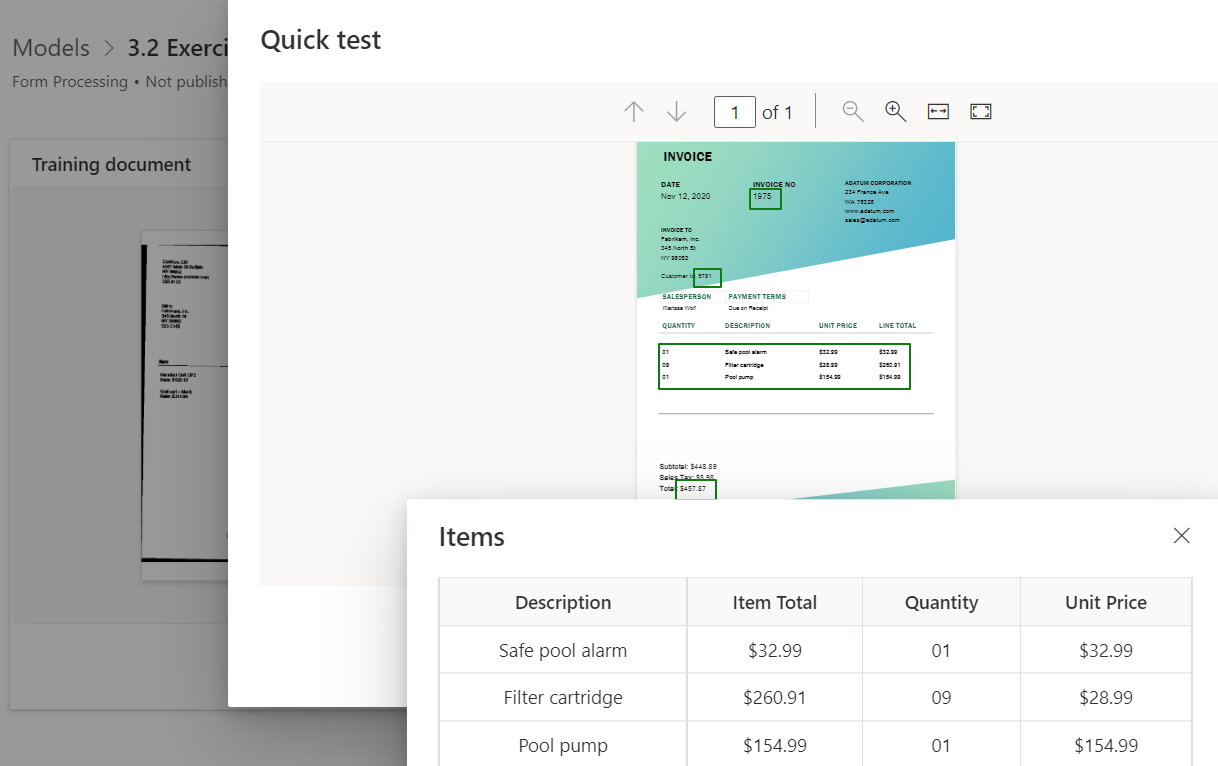

### Assuming you installed Tesseract, use pytesseract to read the [Bowers text image](https://github.com/bellevue-university/dsc360/raw/main/12%20Week/week_3/bowers.jpg). Then, format the resulting text by removing the extraneous characters. Finally, use spaCy to print out the tokens (the text, part of speech, and dependency). (HINT: you may need to print the tokens to see what characters you need to remove.)

In [74]:
import spacy
nlp = spacy.load("en_core_web_sm")

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

# Tesseract is not in PATH;
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

text = pytesseract.image_to_string(Image.open('Data/bowers.jpg'))

In [76]:
import string
import re

# Removes linebreak arguments
text = text.replace("\n", " ")

# Removes multi-spaces
text = re.sub(' +', ' ', text)

# Removes punctuation
punctuations = list(string.punctuation)
punctuations.extend(['’','“','”'])

for element in punctuations:
    text = text.replace(element, '')

In [78]:
doc = nlp(text)

# Prints each piece of Text, Part of Speech, Dependancy, and Explanation
print(f"{'text':{10}} {'POS':{6}} {'Dep':{10}} {'POS explained':{20}}")
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{6}} {token.dep_:{10}} {spacy.explain(token.pos_):{20}}')

text       POS    Dep        POS explained       
           SPACE  dep        space               
The        DET    det        determiner          
Life       PROPN  nmod       proper noun         
and        CCONJ  cc         coordinating conjunction
Work       PROPN  conj       proper noun         
of         ADP    prep       adposition          
Fredson    PROPN  compound   proper noun         
Bowers     PROPN  pobj       proper noun         
by         ADP    prep       adposition          
G          PROPN  compound   proper noun         
THOMAS     PROPN  compound   proper noun         
TANSELLE   PROPN  pobj       proper noun         
N          PROPN  compound   proper noun         
EVERY      DET    det        determiner          
FIELD      NOUN   nsubj      noun                
OF         ADP    prep       adposition          
ENDEAVOR   PROPN  pobj       proper noun         
THERE      PRON   expl       pronoun             
ARE        VERB   ROOT       verb             